In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Data file paths
county_2015_path = "../Output/2015_cleaned_all_county.csv"
state_2015_path = "../Output/2015_cleaned_state.csv"
county_2017_path = "../Output/2017_cleaned_all_county.csv"
state_2017_path = "../Output/2017_cleaned_state.csv"

# Read 2015 and 2017 county and state CSVs
county_2015 = pd.read_csv(county_2015_path)
state_2015 = pd.read_csv(state_2015_path)
county_2017 = pd.read_csv(county_2017_path)
state_2017 = pd.read_csv(state_2017_path)

In [2]:
# Display State 2015
state_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454437
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61930
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603924
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231142
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845611


In [3]:
# Creating 2015 Citizen Poverty DF 
citpov_15_state = state_2015[["State","TotalPop", "VotingAgeCitizen", "Poverty", "Income", "IncomePerCap"]]
citpov_15_state.head()
state_2015_citpov = citpov_15_state.copy()
# state_2015_citpov.head()

In [4]:
# Generate new DF for 2015 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_15 = (state_2015_citpov["Poverty"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["Poverty(%)"] = pov_tpop_prcnt_state_15
cit_tpop_prcnt_state_15 = (state_2015_citpov["VotingAgeCitizen"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_15
citpov_diff_15 = state_2015_citpov["VotingAgeCitizen(%)"] - state_2015_citpov["Poverty(%)"]
state_2015_citpov["CitPovDiff(%)"] = citpov_diff_15
state_2015_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
0,Alabama,4830620,3620994,910480,37973,20780,18.848098,74.959198,56.111100
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576


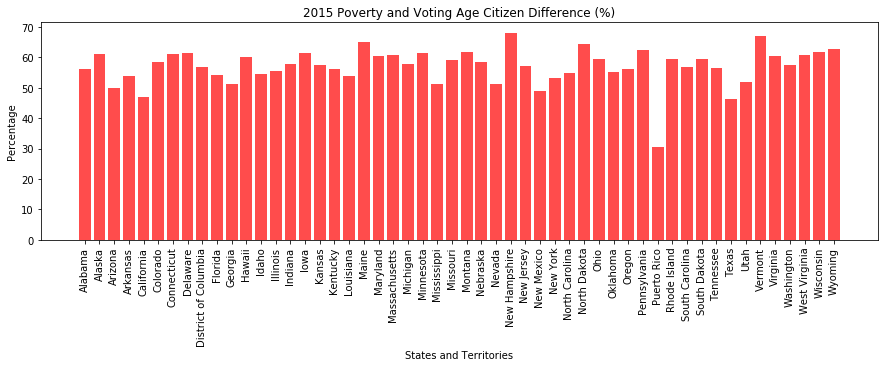

In [5]:
# Bar plot of State 2015 Poverty and Voting Age Citizen differerence (%)
citpovdiff15 = state_2015_citpov["CitPovDiff(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_15, citpovdiff15, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [6]:
# Lowest poverty % 2015
lowest_pov_15 = state_2015_citpov.nsmallest(5, "Poverty(%)")
lowest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
20,Maryland,5930538,4182241,594311,69200,33073,10.021199,70.520432,60.499233
1,Alaska,733375,523946,74612,64197,30332,10.173786,71.443123,61.269337
6,Connecticut,3593222,2574178,377780,71184,37025,10.513684,71.639826,61.126142
30,New Jersey,8904413,6053893,964839,73014,36084,10.835515,67.987559,57.152044


In [7]:
# Highest Voting Age Citizen % 2015
high_vac_15 = state_2015_citpov.nlargest(5, "VotingAgeCitizen(%)")
high_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1329100,1048274,185317,46141,25792,13.943044,78.870965,64.927921
46,Vermont,626604,493124,72234,52653,28487,11.527855,78.697870,67.170015
49,West Virginia,1851420,1455848,333578,39411,21710,18.017414,78.634129,60.616716
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
26,Montana,1014699,781250,154229,44497,25020,15.199483,76.993276,61.793793


In [8]:
# Highest poverty % 2015
highest_pov_15 = state_2015_citpov.nlargest(5, "Poverty(%)")
highest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3583073,2726223,1631029,17920,9617,45.520395,76.086170,30.565774
24,Mississippi,2988081,2210424,675977,34938,18805,22.622446,73.974701,51.352256
31,New Mexico,2084117,1457632,438533,40183,21789,21.041669,69.940027,48.898358
18,Louisiana,4625253,3410634,916437,41411,22064,19.813770,73.739404,53.925634
3,Arkansas,2958208,2164083,571519,36626,20072,19.319771,73.155201,53.835430


In [9]:
# Lowest Voting Age Citizen % 2015
low_vac_15 = state_2015_citpov.nsmallest(5, "VotingAgeCitizen(%)")
low_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576
44,Texas,26538614,16864962,4586120,46561,23551,17.280933,63.548767,46.267834
45,Utah,2903379,1868008,358445,54687,22552,12.345787,64.339103,51.993315
28,Nevada,2798636,1863799,432724,53689,26317,15.461961,66.596692,51.134731
30,New Jersey,8904413,6053893,964839,73014,36084,10.835515,67.987559,57.152044


In [10]:
# Compiled top 10 states in 2015 that had the smallest gap between poverty and voting age citizens
smallest_10_diff_15 = state_2015_citpov.nsmallest(5, "CitPovDiff(%)")
smallest_10_diff_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3583073,2726223,1631029,17920,9617,45.520395,76.086170,30.565774
44,Texas,26538614,16864962,4586120,46561,23551,17.280933,63.548767,46.267834
4,California,38421464,24280349,6260461,56013,27902,16.294176,63.194752,46.900576
31,New Mexico,2084117,1457632,438533,40183,21789,21.041669,69.940027,48.898358
2,Arizona,6641928,4526594,1210351,43252,21052,18.222886,68.151808,49.928921


In [11]:
# Compiled top 10 states in 2015 that had the largest gap between poverty and voting age citizens
largest_10_diff_15 = state_2015_citpov.nlargest(5, "CitPovDiff(%)")
largest_10_diff_15

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,60648,31810,8.926968,77.037398,68.110430
46,Vermont,626604,493124,72234,52653,28487,11.527855,78.697870,67.170015
19,Maine,1329100,1048274,185317,46141,25792,13.943044,78.870965,64.927921
34,North Dakota,721640,546486,82741,55574,31900,11.465689,75.728341,64.262652
51,Wyoming,579679,430026,66992,57042,29223,11.556741,74.183471,62.626730


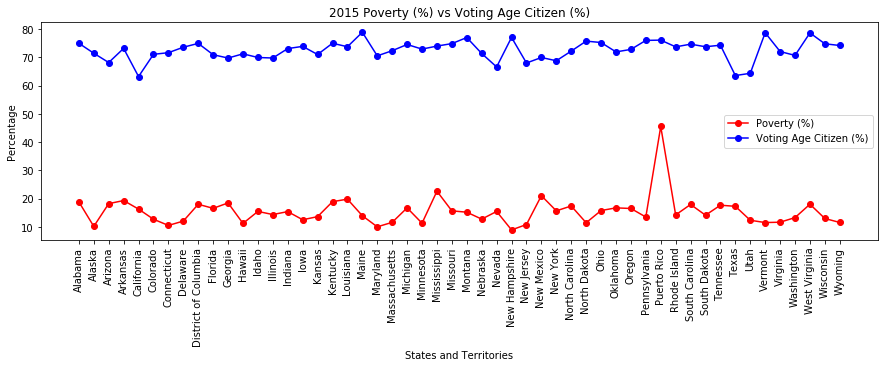

In [12]:
# Line plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2015 = state_2015_citpov["Poverty(%)"]
cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, pov_plt_2015, marker="o", color="red", label="Poverty (%)")
plt.plot(state_15, cit_plt_2015, marker="o", color="blue", label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
# cpdx_15 = smallest_10_diff_15["State"]
# fig, ax = plt.subplots()
# ax.plot((cpdx_15, cpdx_15),(pov_plt_2015, cit_plt_2015),c='red')

plt.show()

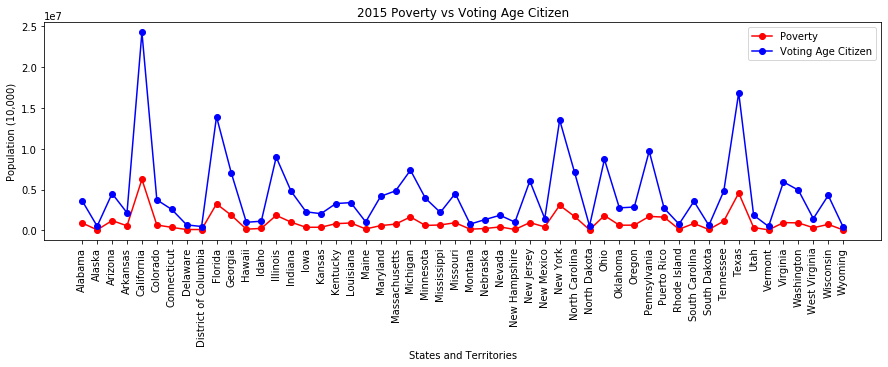

In [13]:
# Line plot of State 2015 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2015 = state_2015_citpov["Poverty"]
citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, povw_plt_2015, marker="o", color="red", label="Poverty")
plt.plot(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (10,000)")
plt.title("2015 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

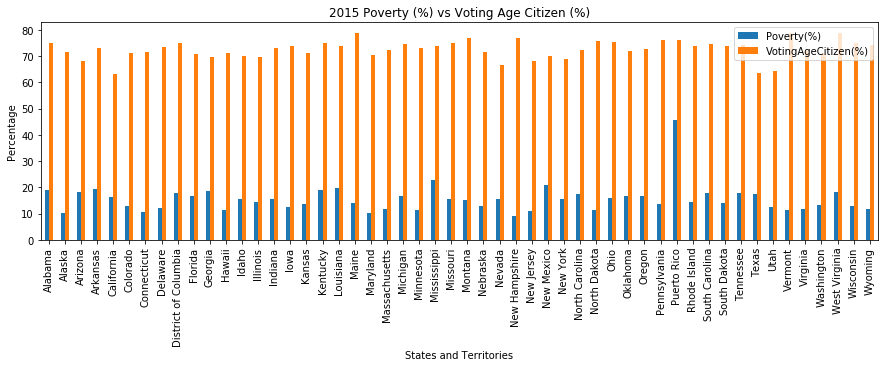

In [14]:
# Multibar plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2015 = state_2015_citpov["Poverty(%)"]
cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
state_15 = state_2015_citpov["State"]
multi_bar_15 = state_2015_citpov[["State", "Poverty(%)", "VotingAgeCitizen(%)"]].plot(kind="bar", figsize=(15,4))
multi_bar_15.set_xticklabels(state_15, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
plt.show()

In [15]:
# # Scatter plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
# pov_plt_2015 = state_2015_citpov["Poverty(%)"]
# cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
# state_15 = state_2015_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_15, pov_plt_2015, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Poverty (%)")
# plt.scatter(state_15, cit_plt_2015, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
# tick_locations = [value for value in state_15]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [16]:
# # Scatter plot of 2015 State Poverty (pop) vs Voting Age Citizen (pop)
# povw_plt_2015 = state_2015_citpov["Poverty"]
# citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
# state_15 = state_2015_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_15, povw_plt_2015, marker="o", color="red", label="Poverty (%)")
# plt.scatter(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Number (10,000)")
# plt.title("2015 Poverty vs Voting Age Citizen")
# tick_locations = [value for value in state_15]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [17]:
# Creating 2017 Citizen Poverty DF 
citpov_17_state = state_2017[["State","TotalPop", "VotingAgeCitizen", "Poverty", "Income", "IncomePerCap"]]
citpov_17_state.head()
state_2017_citpov = citpov_17_state.copy()
state_2017_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap
0,Alabama,4850771,3651914,871849,40271,22180
1,Alaska,738565,530553,75144,66425,31670
2,Arizona,6809946,4690177,1154434,45816,22712
3,Arkansas,2977944,2183895,541298,39025,21449
4,California,38982847,24970109,5893442,61046,30416


In [18]:
# Generate new DF for 2017 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_17 = (state_2017_citpov["Poverty"] / state_2017_citpov["TotalPop"]) * 100
state_2017_citpov["Poverty(%)"] = pov_tpop_prcnt_state_17
cit_tpop_prcnt_state_17 = (state_2017_citpov["VotingAgeCitizen"] / state_2017_citpov["TotalPop"]) * 100
state_2017_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_17
citpov_diff_17 = state_2017_citpov["VotingAgeCitizen(%)"] - state_2017_citpov["Poverty(%)"]
state_2017_citpov["CitPovDiff(%)"] = citpov_diff_17
state_2017_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
0,Alabama,4850771,3651914,871849,40271,22180,17.973411,75.285228,57.311817
1,Alaska,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330
2,Arizona,6809946,4690177,1154434,45816,22712,16.952176,68.872455,51.920280
3,Arkansas,2977944,2183895,541298,39025,21449,18.176903,73.335664,55.158761
4,California,38982847,24970109,5893442,61046,30416,15.118039,64.054093,48.936054


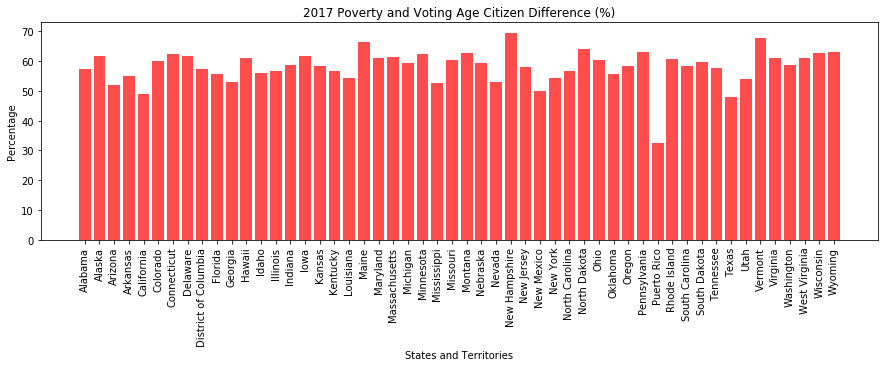

In [19]:
# Bar plot of State 2017 Poverty and Voting Age Citizen differerence (%)
citpovdiff17 = state_2017_citpov["CitPovDiff(%)"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_17, citpovdiff17, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2017 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [20]:
# Lowest poverty % 2017
lowest_pov_17 = state_2017_citpov.nsmallest(5, "Poverty(%)")
lowest_pov_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
20,Maryland,5996079,4248702,584091,72541,35127,9.741216,70.858006,61.116790
6,Connecticut,3594478,2599794,362157,74496,39419,10.075371,72.327442,62.252071
1,Alaska,738565,530553,75144,66425,31670,10.174325,71.835654,61.661330
11,Hawaii,1421658,1016468,147143,68663,33930,10.350098,71.498771,61.148673


In [21]:
# Highest Voting Age Citizen % 2017
high_vac_17 = state_2017_citpov.nlargest(5, "VotingAgeCitizen(%)")
high_vac_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1330158,1055130,171773,49680,27791,12.913729,79.323659,66.409930
46,Vermont,624636,493441,70996,55252,30572,11.365980,78.996568,67.630588
49,West Virginia,1836843,1446498,326916,41701,22859,17.797711,78.749136,60.951426
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
39,Puerto Rico,3468963,2690457,1557395,18412,10244,44.895117,77.557962,32.662845


In [22]:
# Highest poverty % 2017
highest_pov_17 = state_2017_citpov.nlargest(5, "Poverty(%)")
highest_pov_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3468963,2690457,1557395,18412,10244,44.895117,77.557962,32.662845
24,Mississippi,2986220,2220809,643594,37018,20127,21.552129,74.368566,52.816437
31,New Mexico,2084828,1471669,429594,41197,22967,20.605729,70.589468,49.983740
18,Louisiana,4663461,3447638,916393,42654,22939,19.650491,73.928741,54.278250
17,Kentucky,4424376,3325139,810163,41470,22172,18.311351,75.154982,56.843632


In [23]:
# Lowest Voting Age Citizen % 2017
low_vac_17 = state_2017_citpov.nsmallest(5, "VotingAgeCitizen(%)")
low_vac_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
44,Texas,27419612,17512737,4397312,49894,24859,16.037105,63.869383,47.832278
4,California,38982847,24970109,5893442,61046,30416,15.118039,64.054093,48.936054
45,Utah,2993941,1942342,329703,59208,24433,11.012341,64.875761,53.863419
28,Nevada,2887725,1943710,410996,56859,28215,14.232519,67.309387,53.076868
30,New Jersey,8960161,6142332,957460,77047,38538,10.685745,68.551581,57.865835


In [24]:
# Compiled top 10 states in 2017 that had the smallest gap between poverty and voting age citizens
smallest_10_diff_17 = state_2017_citpov.nsmallest(5, "CitPovDiff(%)")
smallest_10_diff_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3468963,2690457,1557395,18412,10244,44.895117,77.557962,32.662845
44,Texas,27419612,17512737,4397312,49894,24859,16.037105,63.869383,47.832278
4,California,38982847,24970109,5893442,61046,30416,15.118039,64.054093,48.936054
31,New Mexico,2084828,1471669,429594,41197,22967,20.605729,70.589468,49.983740
2,Arizona,6809946,4690177,1154434,45816,22712,16.952176,68.872455,51.920280


In [25]:
# Compiled top 10 states in 2017 that had the largest gap between poverty and voting age citizens
largest_10_diff_17 = state_2017_citpov.nlargest(5, "CitPovDiff(%)")
largest_10_diff_17

,State,TotalPop,VotingAgeCitizen,Poverty,Income,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1331848,1034685,108558,64901,34212,8.150930,77.687919,69.536989
46,Vermont,624636,493441,70996,55252,30572,11.365980,78.996568,67.630588
19,Maine,1330158,1055130,171773,49680,27791,12.913729,79.323659,66.409930
34,North Dakota,745475,560530,82241,59795,34084,11.032027,75.190986,64.158959
51,Wyoming,583200,432814,65179,59065,30665,11.176097,74.213649,63.037551


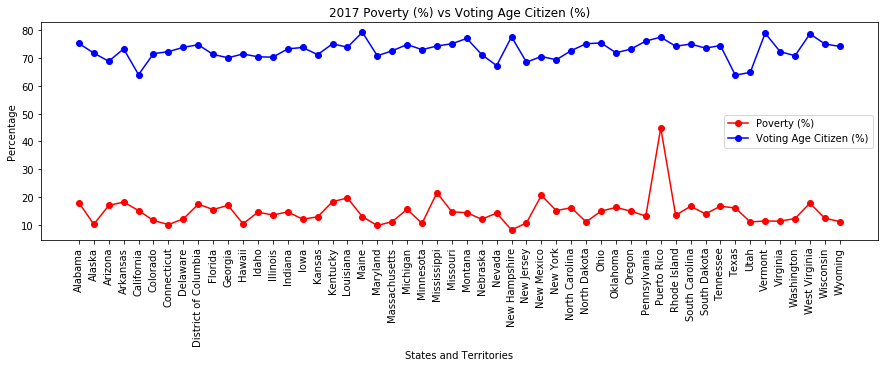

In [26]:
# Line plot of State 2017 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2017 = state_2017_citpov["Poverty(%)"]
cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_17, pov_plt_2017, marker="o", color="red", label="Poverty (%)")
plt.plot(state_17, cit_plt_2017, marker="o", color="blue", label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2017 Poverty (%) vs Voting Age Citizen (%)")
tick_locations = [value for value in state_17]
plt.xticks(tick_locations, rotation="vertical")
# cpdx_17 = smallest_10_diff_17["State"]
# fig, ax = plt.subplots()
# ax.plot((cpdx_15, cpdx_17),(pov_plt_2017, cit_plt_2017),c='red')

plt.show()

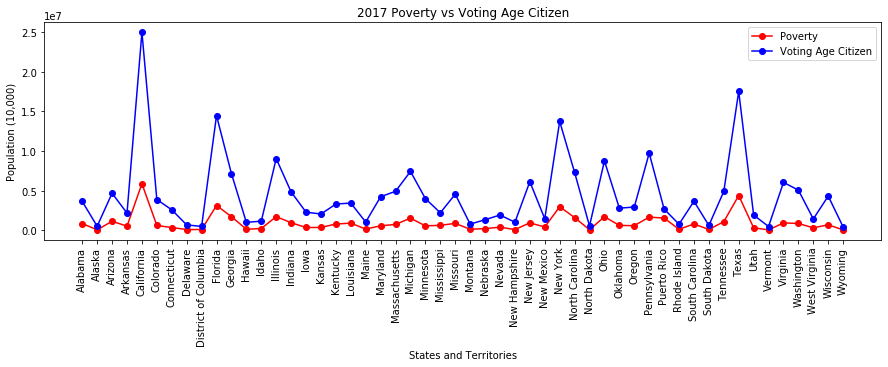

In [27]:
# Line plot of State 2017 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2017 = state_2017_citpov["Poverty"]
citw_plt_2017 = state_2017_citpov["VotingAgeCitizen"]
state_17 = state_2017_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_17, povw_plt_2017, marker="o", color="red", label="Poverty")
plt.plot(state_17, citw_plt_2017, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (10,000)")
plt.title("2017 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_17]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

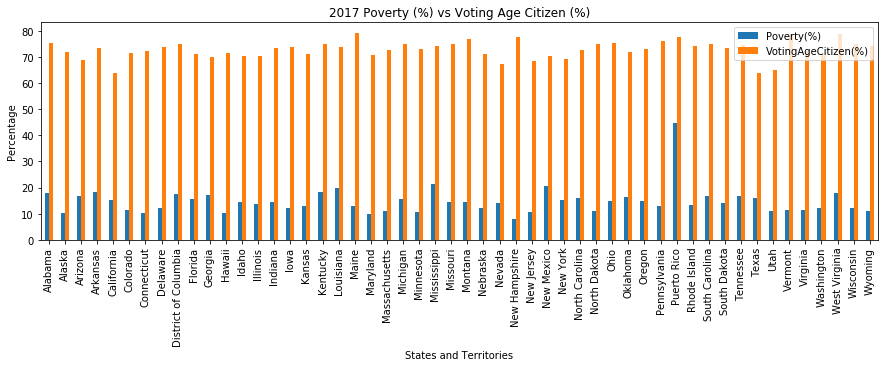

In [28]:
# Multibar plot of State 2017 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2017 = state_2017_citpov["Poverty(%)"]
cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
state_17 = state_2017_citpov["State"]
multi_bar_17 = state_2017_citpov[["State", "Poverty(%)", "VotingAgeCitizen(%)"]].plot(kind="bar", figsize=(15,4))
multi_bar_17.set_xticklabels(state_17, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2017 Poverty (%) vs Voting Age Citizen (%)")
plt.show()

In [29]:
# # Scatter plot of State 2017 Poverty (%) vs Voting Age Citizen (%)
# pov_plt_2017 = state_2017_citpov["Poverty(%)"]
# cit_plt_2017 = state_2017_citpov["VotingAgeCitizen(%)"]
# state_17 = state_2017_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_17, pov_plt_2017, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Poverty (%)")
# plt.scatter(state_17, cit_plt_2017, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Percentage")
# plt.title("2017 Poverty (%) vs Voting Age Citizen (%)")
# tick_locations = [value for value in state_17]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()

In [30]:
# # Scatter plot of 2017 State Poverty (pop) vs Voting Age Citizen (pop)
# povw_plt_2017 = state_2017_citpov["Poverty"]
# citw_plt_2017 = state_2017_citpov["VotingAgeCitizen"]
# state_17 = state_2017_citpov["State"]
# plt.figure(figsize=(15, 4))
# plt.scatter(state_17, povw_plt_2017, marker="o", color="red", label="Poverty (%)")
# plt.scatter(state_17, citw_plt_2017, marker="o", color="blue", label="Voting Age Citizen (%)")
# plt.legend(loc="best")
# plt.xlabel("States and Territories")
# plt.ylabel("Number (10,000)")
# plt.title("2017 Poverty vs Voting Age Citizen")
# tick_locations = [value for value in state_17]
# plt.xticks(tick_locations, rotation="vertical")
# plt.show()